In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

In [50]:
train = pd.read_csv('../data/new_train_ver1.csv')
test = pd.read_csv('../data/new_test_ver1.csv')

train.head()

/tmp/ipykernel_151594/316008140.py:1: DtypeWarning:

Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.



,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0


In [51]:
from sklearn.cluster import KMeans

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

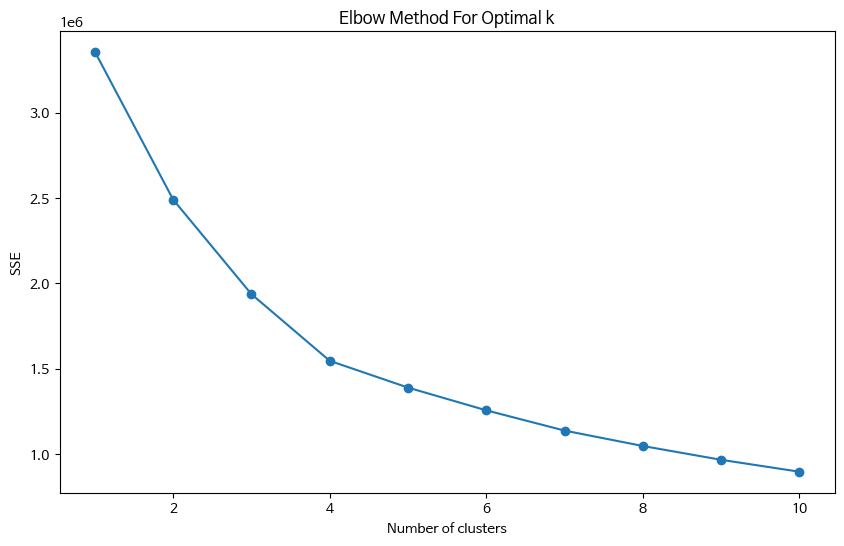

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(train[['전용면적(㎡)', '층', '건축년도']])

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [53]:
optimal_k = 6  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
train['클러스터'] = kmeans.fit_predict(scaled_features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



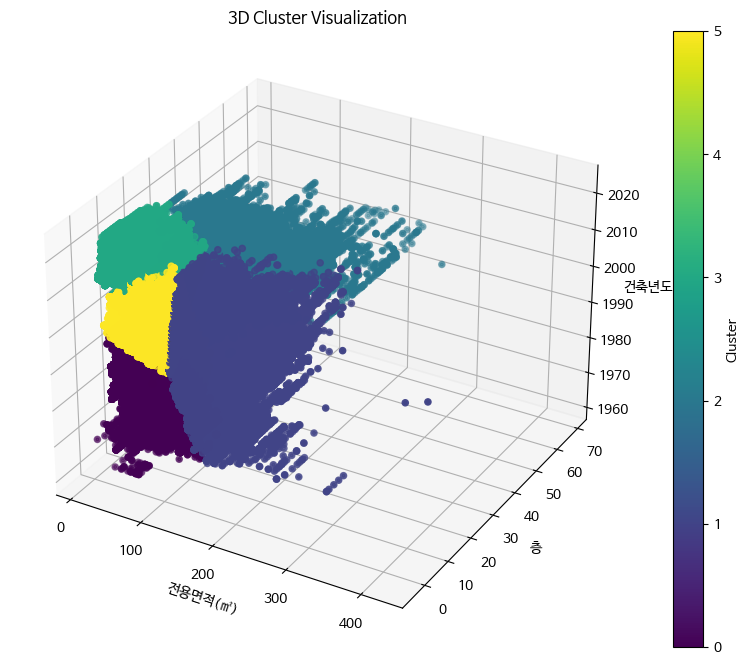

In [54]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train['전용면적(㎡)'], train['층'], train['건축년도'], c=train['클러스터'], cmap='viridis', marker='.')

ax.set_xlabel('전용면적(㎡)')
ax.set_ylabel('층')
ax.set_zlabel('건축년도')
ax.set_title('3D Cluster Visualization')

sc = ax.scatter(train['전용면적(㎡)'], train['층'], train['건축년도'], c=train['클러스터'], cmap='viridis')
plt.colorbar(sc, ax=ax, label='Cluster')

plt.show()

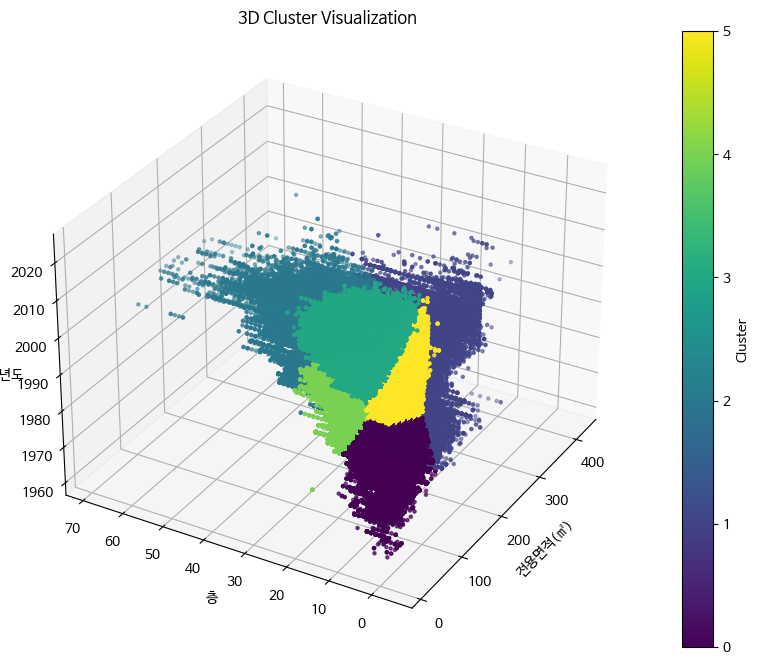

In [57]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(train['전용면적(㎡)'], train['층'], train['건축년도'], c=train['클러스터'], cmap='viridis', marker='.')

ax.set_xlabel('전용면적(㎡)')
ax.set_ylabel('층')
ax.set_zlabel('건축년도')
ax.set_title('3D Cluster Visualization')

plt.colorbar(scatter, ax=ax, label='Cluster')

ax.view_init(elev=30, azim=210)
plt.show()

In [58]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
train['클러스터'] = kmeans.fit_predict(scaled_features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



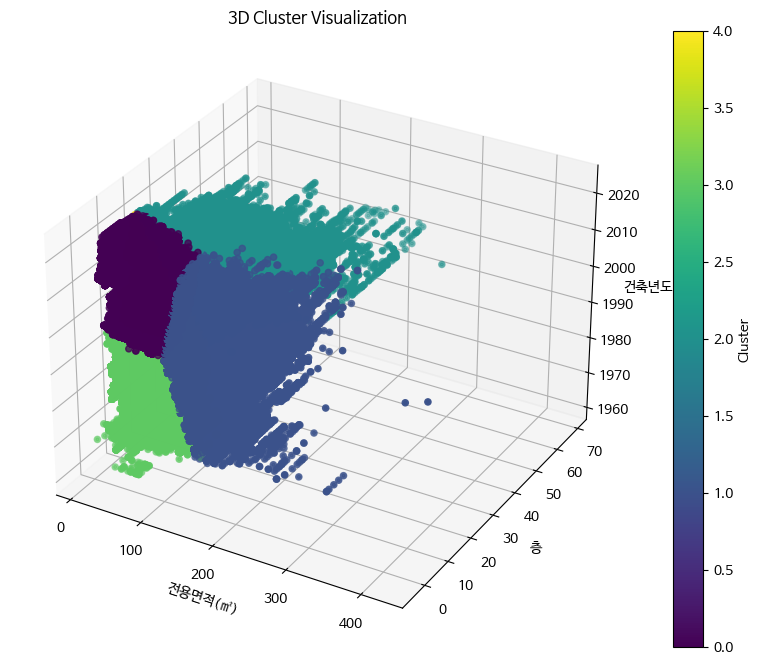

In [59]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train['전용면적(㎡)'], train['층'], train['건축년도'], c=train['클러스터'], cmap='viridis', marker='.')

ax.set_xlabel('전용면적(㎡)')
ax.set_ylabel('층')
ax.set_zlabel('건축년도')
ax.set_title('3D Cluster Visualization')

sc = ax.scatter(train['전용면적(㎡)'], train['층'], train['건축년도'], c=train['클러스터'], cmap='viridis')
plt.colorbar(sc, ax=ax, label='Cluster')

plt.show()

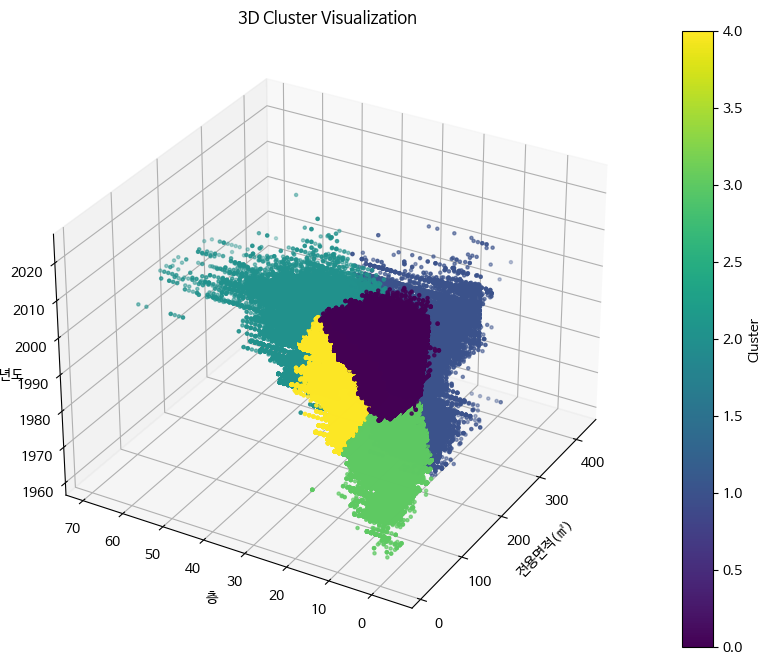

In [60]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(train['전용면적(㎡)'], train['층'], train['건축년도'], c=train['클러스터'], cmap='viridis', marker='.')

ax.set_xlabel('전용면적(㎡)')
ax.set_ylabel('층')
ax.set_zlabel('건축년도')
ax.set_title('3D Cluster Visualization')

plt.colorbar(scatter, ax=ax, label='Cluster')

ax.view_init(elev=30, azim=210)
plt.show()

In [61]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
train['클러스터'] = kmeans.fit_predict(scaled_features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



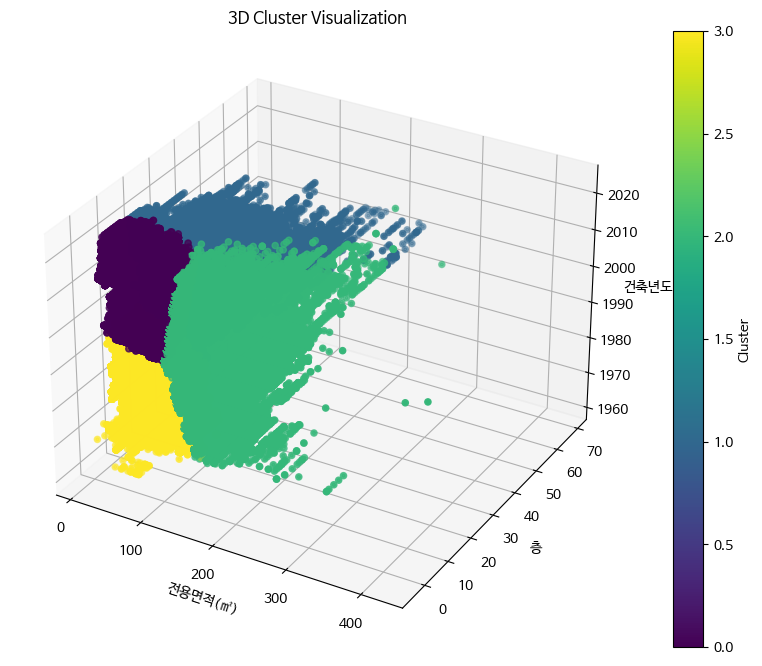

In [62]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train['전용면적(㎡)'], train['층'], train['건축년도'], c=train['클러스터'], cmap='viridis', marker='.')

ax.set_xlabel('전용면적(㎡)')
ax.set_ylabel('층')
ax.set_zlabel('건축년도')
ax.set_title('3D Cluster Visualization')

sc = ax.scatter(train['전용면적(㎡)'], train['층'], train['건축년도'], c=train['클러스터'], cmap='viridis')
plt.colorbar(sc, ax=ax, label='Cluster')

plt.show()

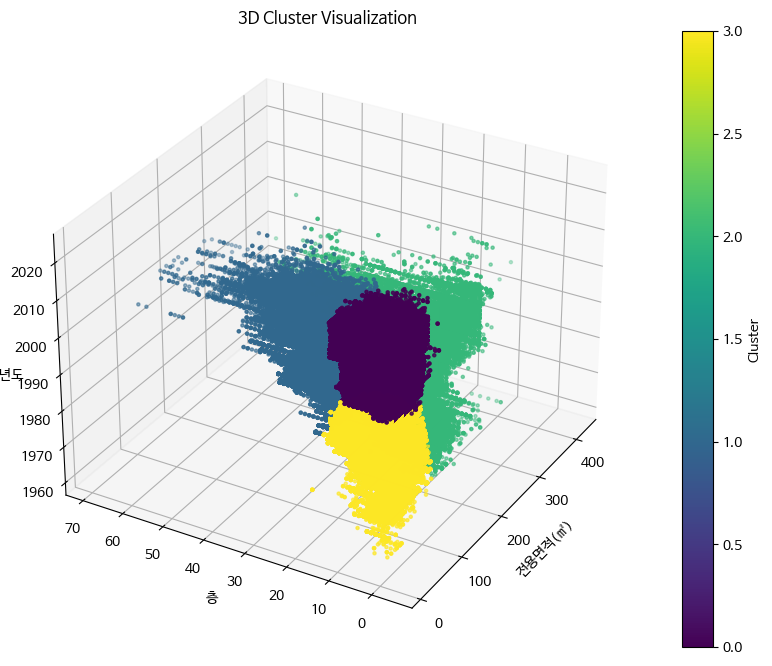

In [63]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(train['전용면적(㎡)'], train['층'], train['건축년도'], c=train['클러스터'], cmap='viridis', marker='.')

ax.set_xlabel('전용면적(㎡)')
ax.set_ylabel('층')
ax.set_zlabel('건축년도')
ax.set_title('3D Cluster Visualization')

plt.colorbar(scatter, ax=ax, label='Cluster')

ax.view_init(elev=30, azim=210)
plt.show()

In [24]:
train['구'] = train['시군구'].map(lambda x : x.split()[1])
train['동'] = train['시군구'].map(lambda x : x.split()[2])
del train['시군구']

In [25]:
test['구'] = test['시군구'].map(lambda x : x.split()[1])
test['동'] = test['시군구'].map(lambda x : x.split()[2])
del test['시군구']

In [27]:
train['계약년'] = train['계약년월'].astype('str').map(lambda x : x[:4])
train['계약월'] = train['계약년월'].astype('str').map(lambda x : x[4:])
del train['계약년월']

In [28]:
test['계약년'] = test['계약년월'].astype('str').map(lambda x : x[:4])
test['계약월'] = test['계약년월'].astype('str').map(lambda x : x[4:])
del test['계약년월']